## Training Linear Models using the Normal Equation

In [4]:
import numpy as np

# to plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize = 4)
mpl.rc('xtick', labelsize = 12)
mpl.rc('ytick', labelsize = 12)

X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1) 

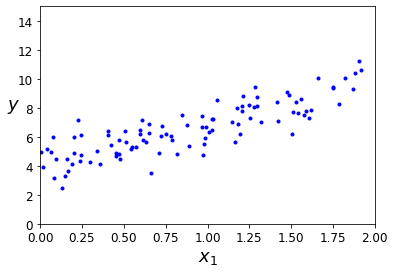

In [6]:
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize = 18)
plt.ylabel("$y$", rotation = 0, fontsize = 18)
plt.axis([0, 2, 0, 15])
plt.show()

In [7]:
X_b = np.c_[np.ones((100, 1)), X] # add x0 = 1 to each instance
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [8]:
# function we used to generate data is 4 + 3x + Gaussian noise
theta_best

array([[4.04756428],
       [2.82982168]])

In [10]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new] # add x0 = 1 to each instance
y_predict = X_new_b.dot(theta_best)
y_predict

array([[4.04756428],
       [9.70720765]])

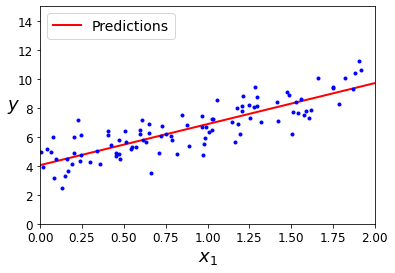

In [18]:
plt.plot(X_new, y_predict, "r-", linewidth=2, label="Predictions")
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([0, 2, 0, 15])
plt.show()

In [13]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(array([4.04756428]), array([[2.82982168]]))

In [14]:
lin_reg.predict(X_new)

array([[4.04756428],
       [9.70720765]])

In [15]:
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond = 1e-6)
theta_best_svd

array([[4.04756428],
       [2.82982168]])

In [16]:
# this function computes theta^ = (X+)y where X+ is the pseudoinverse of X
np.linalg.pinv(X_b).dot(y)

array([[4.04756428],
       [2.82982168]])

## Batch Gradient Descent

In [19]:
# this model is better suited for cases where there are a large number of features
# or too many training instances to fit in memory

# the general idea of gradient descent is to tweak paramaters iteratively in order to 
# minimize the cost function

In [20]:
eta = 0.1 # learning rate
n_iterations = 1000
m = 100

theta = np.random.randn(2, 1) # random initialization

for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients

In [21]:
theta

array([[4.04756428],
       [2.82982168]])

In [22]:
X_new_b.dot(theta)

array([[4.04756428],
       [9.70720765]])

In [23]:
theta_path_bgd = []

def plot_gradient_descent(theta, eta, theta_path=None):
    m = len(X_b)
    plt.plot(X, y, "b.")
    n_iterations = 1000
    for iteration in range(n_iterations):
        if iteration < 10:
            y_predict = X_new_b.dot(theta)
            style = "b-" if iteration > 0 else "r--"
            plt.plot(X_new, y_predict, style)
        gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
        theta = theta - eta * gradients
        if theta_path is not None:
            theta_path.append(theta)
    plt.xlabel("$x_1$", fontsize=18)
    plt.axis([0, 2, 0, 15])
    plt.title(r"$\eta = {}$".format(eta), fontsize=16)

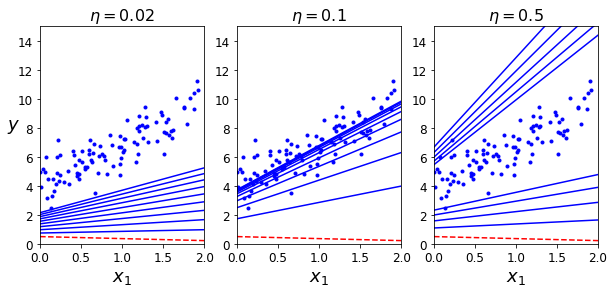

In [24]:
np.random.seed(42)
theta = np.random.randn(2,1)  # random initialization

plt.figure(figsize=(10,4))
plt.subplot(131); plot_gradient_descent(theta, eta=0.02)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(132); plot_gradient_descent(theta, eta=0.1, theta_path=theta_path_bgd)
plt.subplot(133); plot_gradient_descent(theta, eta=0.5)

plt.show()
# this figure shows the first 10 steps of Gradient Descent using three different learning rates

# the one on the left is too slow, it will get there but take a long time
# the one in the middle looks pretty good, in just a few steps it has converged to the solution
# the one on the right is too high, the algorithm diverges